###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     `1172598`


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

**Adding proper comments to your code is MANDATORY. **

## 1. K-NN classifier

In [1]:
#README
#I used Anaconda version 24.1.2 which uses python version 3.11.7
#Ensure the .csv files are in the same directory as this file.
#Simply run all nodes of COMP30027_2024_asst1.ipynb on preferred IDE. 
#Runtime for each KNN_classifier is around 2 minutes. Hence expect long runtime for whole program (about 8 minutes total).

In [2]:
import pandas as pd
import random

wine_train = pd.read_csv('winequality-train.csv')
wine_test = pd.read_csv('winequality-test.csv')

def KNN_Classifier(k, df_test, df_train):
    labels = []

    # Iterate through test data
    for index, row in df_test.drop(columns=['quality']).iterrows():
        distance_arr = []

        # Iterate through training data
        for index1, row1 in df_train.drop(columns=['quality']).iterrows():
            # Call function that calculates distance and add to distance array
            distance_arr.append(Calc_Distance(len(df_test.columns)-1, row, row1))

        # Add distance array to dataframe and sort it by distance
        df_temp = df_train.assign(distance=distance_arr)
        df_temp = df_temp.sort_values('distance')

        labels.append(Vote(k, df_temp))
    return labels

# Function to calculate distance of multi dimensional arrays
def Calc_Distance(length, row, row1):
    # Value used for distance i.e (a-b)^2
    dis = 0

    # Iterate through all attributes of both test and training instances
    for i in range(length):
        # Add each dis value for each attribute for instances from test and training
        dis = dis + pow(row.iloc[i] - row1.iloc[i], 2)
    
    # Return multi dimensional distance
    return pow(dis, 1/2)

# Conditionals to check voting criteria
def Vote(k, df_temp):
    if (k == 1):
        label = df_temp['quality'].iloc[0]
    else:
        # Nearest quality predictions, note the distance is already sorted
        values = df_temp[['quality', 'distance']][0:k].reset_index()

        # Iterate through k values of predicted quality and count good and bad predictions
        good = 0
        bad = 0
        for index, row in values.iterrows():
            if (row['quality'] == 0):
                bad = bad + 1
            else:
                good = good + 1
        # Check each outcome
        if (good == bad):
            # This is case where 
            dups = values['distance'].duplicated().tolist()
            # Check if duplicates exits
            if True in dups:
                count = 0
                # Get all duplicates of nearest distance, ignore other duplicates
                for index in range(len(dups)):
                    if (dups[index] == True):
                        if (count == 0):
                            start = index - 1
                        count = count + 1
                        if (index == 9):
                            end = start + count
                            break
                    elif ((dups[index] == False and count != 0) or (dups[index] == True and index == 9)):
                        end = start + count
                        break
                # All nearest duplicates
                same_dis = values['quality'][start:end].tolist()

                # If duplicates all have same quality just pick 1-NN
                if (len(set(same_dis)) == 1):
                    label = values['quality'].iloc[0]
                # Otherwise pick randomly amongst duplicates
                else:
                    label = random.choice(same_dis)
                    
            # Simply pick 1-NN if no duplicates
            else:
                label = values['quality'].iloc[0]
        elif (good > bad):
            label = 1
        else:
            label = 0
    return label



## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [3]:
def Find_Proportion(df_test, labels_classified):
    labels_test = df_test['quality'].tolist()
    count = 0

    # Count number of TPs and TNs
    for i in range(len(labels_classified)):
        if (labels_test[i] == labels_classified[i]):
            count = count + 1
    # Divide number of TPs and TNs by total number of labels
    return float(count)/float(len(labels_classified))

labels = KNN_Classifier(1, wine_test, wine_train)

In [4]:
print("Accuracy: {:0.4f}".format(Find_Proportion(wine_test, labels)))

Accuracy: 0.7644


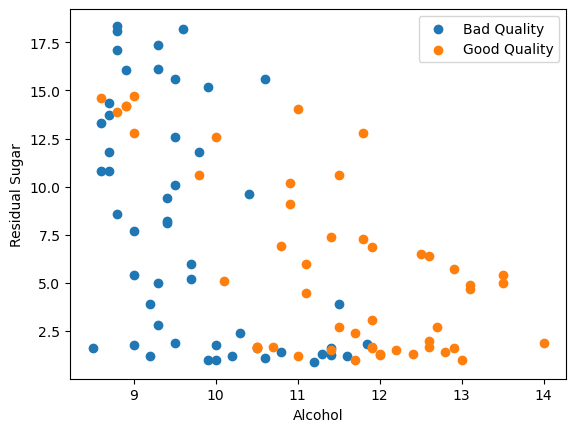

In [5]:
import matplotlib.pyplot as plt

df_2_params = wine_train[['residualSugar', 'alcohol', 'quality']].sample(n=100)
x1 = df_2_params[df_2_params['quality'] == 0]['alcohol']
y1 = df_2_params[df_2_params['quality'] == 0]['residualSugar']
plt.scatter(x1, y1)

x2 = df_2_params[df_2_params['quality'] == 1]['alcohol']
y2 = df_2_params[df_2_params['quality'] == 1]['residualSugar']
plt.scatter(x2, y2)

plt.xlabel("Alcohol")
plt.ylabel("Residual Sugar")
plt.legend(["Bad Quality" , "Good Quality"])
plt.show()

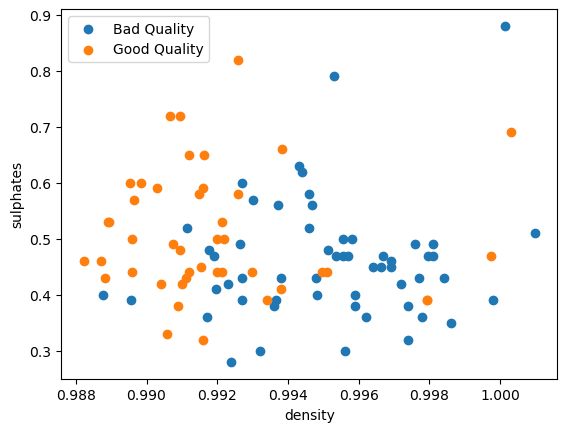

In [6]:
import matplotlib.pyplot as plt

df_2_params = wine_train[['density', 'sulphates', 'quality']].sample(n=100)
x1 = df_2_params[df_2_params['quality'] == 0]['density']
y1 = df_2_params[df_2_params['quality'] == 0]['sulphates']
plt.scatter(x1, y1)

x2 = df_2_params[df_2_params['quality'] == 1]['density']
y2 = df_2_params[df_2_params['quality'] == 1]['sulphates']
plt.scatter(x2, y2)

plt.xlabel("density")
plt.ylabel("sulphates")
plt.legend(["Bad Quality" , "Good Quality"])
plt.show()

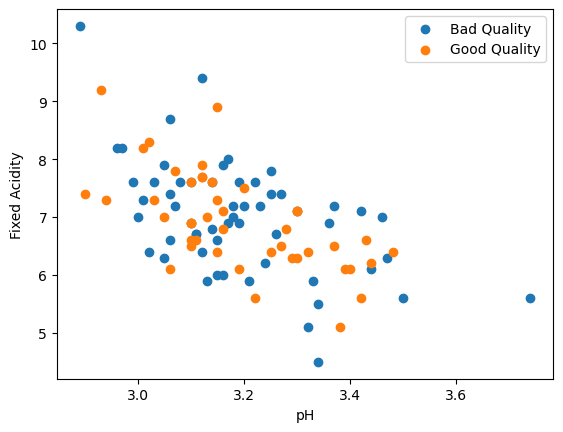

In [7]:
import matplotlib.pyplot as plt

df_2_params = wine_train[['pH', 'fixedAcidity', 'quality']].sample(n=100)
x1 = df_2_params[df_2_params['quality'] == 0]['pH']
y1 = df_2_params[df_2_params['quality'] == 0]['fixedAcidity']
plt.scatter(x1, y1)

x2 = df_2_params[df_2_params['quality'] == 1]['pH']
y2 = df_2_params[df_2_params['quality'] == 1]['fixedAcidity']
plt.scatter(x2, y2)

plt.xlabel("pH")
plt.ylabel("Fixed Acidity")
plt.legend(["Bad Quality" , "Good Quality"])
plt.show()

## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [8]:
def Get_Min(df):
    min_vals = []
    # Get minimum values for each attribute
    for name, series in df.items():
        min_vals.append(series.min())
    return min_vals

def Get_Max(df):
    max_vals = []
    # Get maximum values for each attribute
    for name, series in df.items():
        max_vals.append(series.max())
    return max_vals

def Min_Max_Scale(df, min_vals, max_vals):
    df = df.drop(columns=['quality'])

    # Create empty datafram with column names
    df_scale = pd.DataFrame(columns=df.columns)

    for index, row in df.iterrows():
        temp_row = []
        # For each attribute in row apply min_max equations and append to new row
        for i in range(len(row)):
            scale = (row.iloc[i] - min_vals[i])/(max_vals[i] - min_vals[i])
            temp_row.append(scale)
        # Add row to new dataframe
        df_scale.loc[index] = temp_row
    return df_scale

def Get_Std(df):
    std_vals = []

    # Get std for each attribute
    for name, series in df.items():
        std_vals.append(series.std())
    return std_vals

def Get_Mean(df):
    mean_vals = []

    # Get mean for each attribute
    for name, series in df.items():
        mean_vals.append(series.mean())
    return mean_vals

def Standarise(df, std_vals, mean_vals):
    df = df.drop(columns=['quality'])

    # Create empty datafram with column names
    df_standard = pd.DataFrame(columns=df.columns)
    for index, row in df.iterrows():
        temp_row = []
        # Standardise each attribute in row and add to new row
        for i in range(len(row)):
            scale = (row.iloc[i] - mean_vals[i])/(std_vals[i])
            temp_row.append(scale)
        # Add row to new dataframe
        df_standard.loc[index] = temp_row
    return df_standard

In [9]:
# Use only parameters of training set
Min_Max_wine_train = Min_Max_Scale(wine_train, Get_Min(wine_train), Get_Max(wine_train)).assign(quality=wine_train['quality'])
Min_Max_wine_test = Min_Max_Scale(wine_test, Get_Min(wine_train), Get_Max(wine_train)).assign(quality=wine_test['quality'])

Standardised_wine_train = Standarise(wine_train, Get_Std(wine_train), Get_Mean(wine_train)).assign(quality=wine_train['quality'])
Standardised_wine_test = Standarise(wine_test, Get_Std(wine_train), Get_Mean(wine_train)).assign(quality=wine_test['quality'])

In [10]:
labels_Min_Max = KNN_Classifier(1, Min_Max_wine_test, Min_Max_wine_train)
labels_Standardised = KNN_Classifier(1, Standardised_wine_test, Standardised_wine_train)

In [11]:
print("Accuracy Min_Max: {:0.4f}".format(Find_Proportion(Min_Max_wine_test, labels_Min_Max)))
print("Accuracy Standardised: {:0.4f}".format(Find_Proportion(Standardised_wine_test, labels_Standardised)))

Accuracy Min_Max: 0.8504
Accuracy Standardised: 0.8674


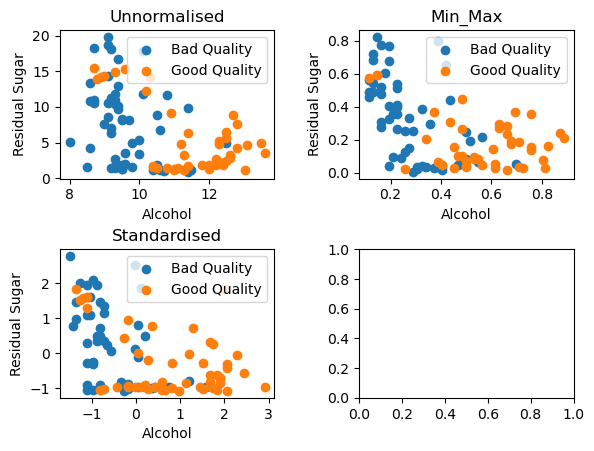

In [16]:
df_2_params_normal = wine_train[['residualSugar', 'alcohol', 'quality']].sample(n=100)

x1 = df_2_params_normal[df_2_params_normal['quality'] == 0]['alcohol']
y1 = df_2_params_normal[df_2_params_normal['quality'] == 0]['residualSugar']

x2 = df_2_params_normal[df_2_params_normal['quality'] == 1]['alcohol']
y2 = df_2_params_normal[df_2_params_normal['quality'] == 1]['residualSugar']

figure, axis = plt.subplots(2, 2)
figure.tight_layout(pad=3)

axis[0, 0].scatter(x1, y1)
axis[0, 0].scatter(x2, y2)
axis[0, 0].set_xlabel("Alcohol")
axis[0, 0].set_ylabel("Residual Sugar")
axis[0, 0].legend(["Bad Quality" , "Good Quality"])
axis[0, 0].set_title("Unnormalised")

df_2_params_min_max = Min_Max_wine_train[['residualSugar', 'alcohol', 'quality']].sample(n=100)

x1 = df_2_params_min_max[df_2_params_min_max['quality'] == 0]['alcohol']
y1 = df_2_params_min_max[df_2_params_min_max['quality'] == 0]['residualSugar']

x2 = df_2_params_min_max[df_2_params_min_max['quality'] == 1]['alcohol']
y2 = df_2_params_min_max[df_2_params_min_max['quality'] == 1]['residualSugar']

axis[0, 1].scatter(x1, y1)
axis[0, 1].scatter(x2, y2)
axis[0, 1].set_xlabel("Alcohol")
axis[0, 1].set_ylabel("Residual Sugar")
axis[0, 1].legend(["Bad Quality" , "Good Quality"])
axis[0, 1].set_title("Min_Max")

df_2_params_standard = Standardised_wine_train[['residualSugar', 'alcohol', 'quality']].sample(n=100)

x1 = df_2_params_standard[df_2_params_standard['quality'] == 0]['alcohol']
y1 = df_2_params_standard[df_2_params_standard['quality'] == 0]['residualSugar']

x2 = df_2_params_standard[df_2_params_standard['quality'] == 1]['alcohol']
y2 = df_2_params_standard[df_2_params_standard['quality'] == 1]['residualSugar']

axis[1, 0].scatter(x1, y1)
axis[1, 0].scatter(x2, y2)
axis[1, 0].set_xlabel("Alcohol")
axis[1, 0].set_ylabel("Residual Sugar")
axis[1, 0].legend(["Bad Quality" , "Good Quality"])
axis[1, 0].set_title("Standardised")

plt.show()

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

### 4.2
Implement two additional distance measures for your K-NN model: cosine similarity and Mahalanobis distance (you may use library functions for these distance measures). Do 1-NN classification using each of these new distance measures and the three normalization options from Question 3. Discuss how the new distance metrics compare to Euclidean distance and how each metric is affected by normalization.

In [13]:
from scipy.spatial import distance
import numpy as np

def KNN_Classifier_Mahal(k, df_test, df_train):
    labels = []
    iv = np.cov(df_train.drop(columns=['quality']).values.T)

    # Iterate through test data
    for index, row in df_test.drop(columns=['quality']).iterrows():
        distance_arr = []

        # Iterate through training data
        for index1, row1 in df_train.drop(columns=['quality']).iterrows():
            # Call function that calculates distance and add to distance array
            distance_arr.append(distance.mahalanobis(row, row1, iv))

        # Add distance array to dataframe and sort it by distance
        df_temp = df_train.assign(distance=distance_arr)
        df_temp = df_temp.sort_values('distance')

        labels.append(Vote(k, df_temp))
    return labels

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

def KNN_Classifier_Cos(k, df_test, df_train):
    labels = []

    #Calculate cosine similarity
    distance_arr = cosine_similarity(df_test.drop(columns=['quality']), df_train.drop(columns=['quality']))

    for index in range(len(distance_arr)):
        # Add distance array to dataframe and sort it by distance
        df_temp = df_train.assign(distance=distance_arr[index])
        df_temp = df_temp.sort_values('distance', ascending=False)
        
        labels.append(Vote(k, df_temp))
    return labels

In [22]:
labels_Mahal = KNN_Classifier_Mahal(1, wine_test, wine_train)
labels_Min_Max_Mahal = KNN_Classifier_Mahal(1, Min_Max_wine_test, Min_Max_wine_train)
labels_Standardised_Mahal = KNN_Classifier_Mahal(1, Standardised_wine_test, Standardised_wine_train)

labels_cos = KNN_Classifier_Cos(1, wine_test, wine_train)
labels_Min_Max_cos = KNN_Classifier_Cos(1, Min_Max_wine_test, Min_Max_wine_train)
labels_Standardised_cos = KNN_Classifier_Cos(1, Standardised_wine_test, Standardised_wine_train)

print("Accuracy Mahel: {:0.4f}".format(Find_Proportion(wine_test, labels_Mahal)))
print("Accuracy Min_Max Mahel: {:0.4f}".format(Find_Proportion(Min_Max_wine_test, labels_Min_Max_Mahal)))
print("Accuracy Standardised Mahel: {:0.4f}".format(Find_Proportion(Standardised_wine_test, labels_Standardised_Mahal)))

print("Accuracy Cos: {:0.4f}".format(Find_Proportion(wine_test, labels_cos)))
print("Accuracy Min_Max Cos: {:0.4f}".format(Find_Proportion(Min_Max_wine_test, labels_Min_Max_cos)))
print("Accuracy Standardised Cos: {:0.4f}".format(Find_Proportion(Standardised_wine_test, labels_Standardised_cos)))

Accuracy Mahel: 0.7015
Accuracy Min_Max Mahel: 0.8422
Accuracy Standardised Mahel: 0.8600
Accuracy Cos: 0.7704
Accuracy Min_Max Cos: 0.8519
Accuracy Standardised Cos: 0.8644


### 4.3
Implement either of the two K-NN weighting strategies discussed in lecture (inverse linear distance or inverse distance). Compare the performance of the weighted and majority vote models for a few different values of K. In your write-up, discuss how weighting strategy and the value of K affect the model's decisions.

### 4.4
Measure the empirical distribution of class labels in the training dataset (what percentage of the training data comes from each class). Then evaluate the distribution of labels predicted by your K-NN model for the test data, for a range of values for K. Does the class distribution of the predicted labels match the class distribution of the training data? Explain why or why not.